In [68]:
#Dependencies 

from census import Census
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import csv
from config import census_key
import geopandas as gpd

In [69]:
#import fort_state_zip.csv
fort_data =pd.read_csv('fort_state_zip.csv')
fort_data

,Name,State,Zip Code
0,Fort Novosel,AL,36362
1,Fort Huachuca,AZ,85613
2,Fort Irwin,CA,92310
3,Fort Carson,CO,80913
4,Fort Eisenhower,GA,30905
5,Fort Moore,GA,31905
6,Fort Stewart,GA,31313
7,Fort Leavenworth,KS,66027
8,Fort Riley,KS,66442
9,Fort Campbell,KY,42223


In [70]:
fort_data["Nearest City"] = ["Donthan",
                             "Sierra Vista", 
                             "barstow",
                             "Colorado Springs",
                             "Agusta",
                             "Columbus",
                             "Hinesville",
                             "Leavenworth",
                             "Manhattan",
                             "Clarksville",
                             "Elizabethtown",
                             "Leesville",
                             "Frederick",
                             "Odenton",
                             "Waynesville",
                             "Watertown",
                             "New York City",
                             "Fayetteville",
                             "Lawton",
                             "Columbia",
                             "El Paso",
                             "Killeen",
                             "Alexandria",
                             "Petersburg",
                             "Arlington",
                             "Tacoma",
                             "Sparta"]
fort_data["City Zipcode"] = [36301,
                             85635,
                             92311,
                             80903,
                             30904,
                             31901,
                             31313,
                             66048,
                             66502,
                             37040,
                             42701,
                             71446,
                             21701,
                             21113,
                             65583,
                             13601,
                             11209,
                             28301,
                             73501,
                             29201,
                             79901,
                             76541,
                             22301,
                             23803,
                             22201,
                             98402,
                             54656]
                        
                             

fort_data                      

,Name,State,Zip Code,Nearest City,City Zipcode
0,Fort Novosel,AL,36362,Donthan,36301
1,Fort Huachuca,AZ,85613,Sierra Vista,85635
2,Fort Irwin,CA,92310,barstow,92311
3,Fort Carson,CO,80913,Colorado Springs,80903
4,Fort Eisenhower,GA,30905,Agusta,30904
5,Fort Moore,GA,31905,Columbus,31901
6,Fort Stewart,GA,31313,Hinesville,31313
7,Fort Leavenworth,KS,66027,Leavenworth,66048
8,Fort Riley,KS,66442,Manhattan,66502
9,Fort Campbell,KY,42223,Clarksville,37040


In [71]:
# Initialize Census with your API key
census_key = "cbc5dafcc66b3d11a52b9a7114bd19f59ae2d5da"
c = Census(census_key, year=2021)  # Try 2021 if 2023 is unsupported

# Define your list of zip codes as strings
fort_zips = fort_data['Zip Code'].astype(str).tolist()
fort_names = fort_data['Name'].tolist()
city_names = fort_data['Nearest City'].tolist()
city_zips = fort_data['City Zipcode'].astype(str).tolist()

# Run Census Search to retrieve data on all zip codes
census_data = []
for zip_code in city_zips:
    try:
        data = c.acs5.get(
            (
                "NAME",
                "B19013_001E",  # Household Income
                "B01003_001E",  # Population
                "B19301_001E",  # Per Capita Income
                "B17001_002E"   # Poverty Count
            ),
            {'for': f'zip code tabulation area:{zip_code}'}
        )
        census_data.extend(data)
    except CensusException as e:
        print(f"Error retrieving data for zip code {zip_code}: {e}")
        continue

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns={
        "B01003_001E": "Population",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)


# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd


Number of rows in the DataFrame: 27


,Name,Household Income,Population,Per Capita Income,Poverty Count,Zipcode
0,ZCTA5 36301,43054.0,37699.0,26609.0,8151.0,36301
1,ZCTA5 85635,57689.0,35167.0,33603.0,4736.0,85635
2,ZCTA5 92311,49919.0,34204.0,23139.0,9158.0,92311
3,ZCTA5 80903,52963.0,16844.0,35579.0,2632.0,80903
4,ZCTA5 30904,39026.0,27125.0,26367.0,7162.0,30904
5,ZCTA5 31901,34578.0,5728.0,27625.0,1496.0,31901
6,ZCTA5 31313,50526.0,41967.0,23524.0,7361.0,31313
7,ZCTA5 66048,63541.0,36185.0,35133.0,3962.0,66048
8,ZCTA5 66502,48238.0,44789.0,26614.0,12415.0,66502
9,ZCTA5 37040,58229.0,58490.0,27408.0,9679.0,37040


In [72]:
census_pd['Name'] = fort_names
census_pd["Nearest City"] = fort_data["Nearest City"]
new_column_order = ["Name","Nearest City","Zipcode","Population","Poverty Count","Household Income"]
census_pd = census_pd[new_column_order]
poverty_rates = []

for index, row in census_pd.iterrows():
    poverty_rate = (row["Poverty Count"] / row["Population"]) * 100
    poverty_rates.append(poverty_rate)


census_pd.loc[:, "Poverty Rate (%)"] = poverty_rates
census_pd["National Poverty Rate"] = 11.4

# Ensure Nearest City values are stripped of extra spaces and title-cased to match dictionary keys
census_pd.loc[:, "Nearest City"] = census_pd["Nearest City"].str.strip().str.title()

# Map coordinates to the DataFrame based on 'Nearest City'
census_pd.loc[:, "Latitude"] = census_pd["Nearest City"].map(lambda city: coordinates[city]["Latitude"])
census_pd.loc[:, "Longitude"] = census_pd["Nearest City"].map(lambda city: coordinates[city]["Longitude"])

# Display the DataFrame to verify
census_pd


,Name,Nearest City,Zipcode,Population,Poverty Count,Household Income,Poverty Rate (%),National Poverty Rate,Latitude,Longitude
0,Fort Novosel,Donthan,36301,37699.0,8151.0,43054.0,21.621263,11.4,31.223000,-85.390500
1,Fort Huachuca,Sierra Vista,85635,35167.0,4736.0,57689.0,13.467171,11.4,31.545500,-110.277300
2,Fort Irwin,Barstow,92311,34204.0,9158.0,49919.0,26.774646,11.4,34.895800,-117.017300
3,Fort Carson,Colorado Springs,80903,16844.0,2632.0,52963.0,15.625742,11.4,38.833900,-104.821400
4,Fort Eisenhower,Agusta,30904,27125.0,7162.0,39026.0,26.403687,11.4,33.473500,-82.010500
5,Fort Moore,Columbus,31901,5728.0,1496.0,34578.0,26.117318,11.4,32.460976,-84.987709
6,Fort Stewart,Hinesville,31313,41967.0,7361.0,50526.0,17.539972,11.4,31.846900,-81.595900
7,Fort Leavenworth,Leavenworth,66048,36185.0,3962.0,63541.0,10.949288,11.4,39.311100,-94.922500
8,Fort Riley,Manhattan,66502,44789.0,12415.0,48238.0,27.718860,11.4,39.183600,-96.571700
9,Fort Campbell,Clarksville,37040,58490.0,9679.0,58229.0,16.548128,11.4,36.529800,-87.359500


In [73]:
census_pd.to_excel('census_data.xlsx', index=True)

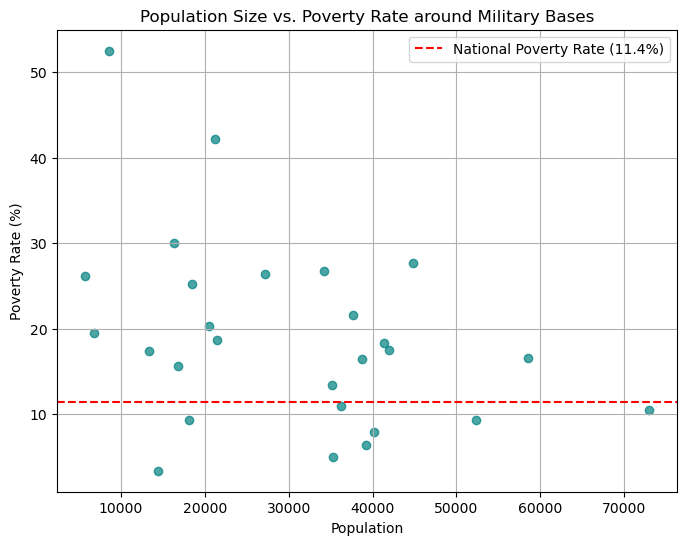

In [74]:
import matplotlib.pyplot as plt

# Scatter plot with Population vs. Poverty Rate
plt.figure(figsize=(8, 6))
plt.scatter(census_pd["Population"], census_pd["Poverty Rate (%)"], color="teal", alpha=0.7)

# Use the National Poverty Rate column to draw the reference line
plt.axhline(y=census_pd["National Poverty Rate"].iloc[0], color="red", linestyle="--", label="National Poverty Rate (11.4%)")

plt.title("Population Size vs. Poverty Rate around Military Bases")
plt.xlabel("Population")
plt.ylabel("Poverty Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

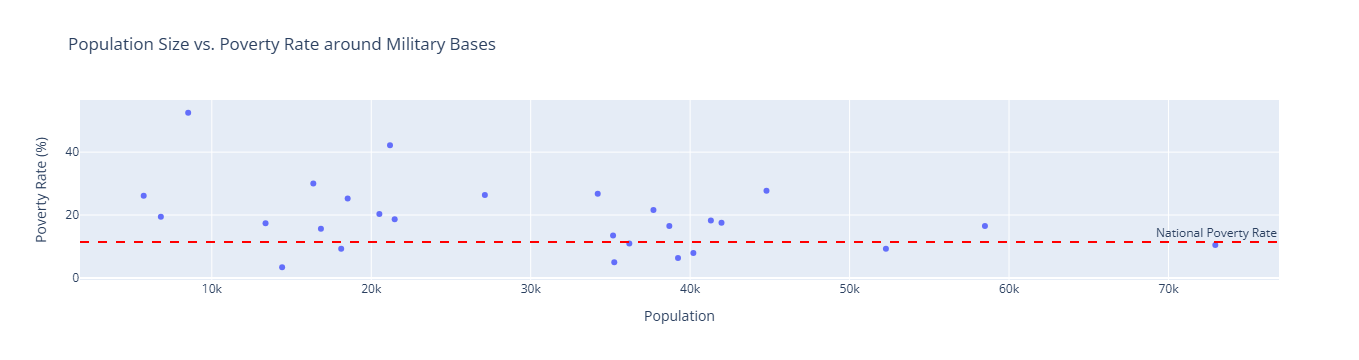

In [75]:
import plotly.express as px

# Create a Plotly scatter plot without "State" in hover data
fig = px.scatter(
    census_pd,
    x="Population",
    y="Poverty Rate (%)",
    title="Population Size vs. Poverty Rate around Military Bases",
    labels={"Population": "Population", "Poverty Rate (%)": "Poverty Rate (%)"},
    hover_data={
        "Name": True,        # Base name
        "Population": True,  # Population size
        "National Poverty Rate": True  # National poverty rate for reference
    }
)

# Add a reference line for the national poverty rate
fig.add_hline(
    y=census_pd["National Poverty Rate"].iloc[0],
    line_dash="dash",
    line_color="red",
    annotation_text="National Poverty Rate"
)

# Show the plot
fig.show()


In [76]:
# Convert the DataFrame to a GeoDataFrame if latitude and longitude data are available
census_pd["geometry"] = gpd.points_from_xy(census_pd["Longitude"], census_pd["Latitude"])
geo_census_pd = gpd.GeoDataFrame(census_pd, geometry="geometry")

# Create the map plot
map_plot = geo_census_pd.hvplot.points(
    x='Longitude', 
    y='Latitude', 
    geo=True, 
    tiles='OSM',  # OpenStreetMap background tiles
    frame_width=700, 
    frame_height=500, 
    size='Population',  # Size points based on Population
    scale=0.01,         # Adjust scale for better visualization
    color='Nearest City',  # Color points by the city name
    hover_cols=['Name', 'Nearest City', 'Population', 'Poverty Rate (%)']  # Add hover information
)

# Display the map plot
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Nearest City,Population,Name,Poverty Rate (%))